# First Autoencoder  

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

## Data 생성
- 3 차원 data 생성

In [2]:
# 데이터 포인트 수 설정
m = 100

# 임의의 각도를 생성합니다. 각도는 -0.5에서 3π/2 - 0.5 사이의 값을 가집니다.
angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5

# 데이터를 저장할 빈 배열을 생성합니다. 배열의 크기는 (100, 3)입니다.
data = np.empty((m, 3))

# 첫 번째 열: 각도에 대한 코사인 값과 사인 값의 조합에 작은 노이즈를 추가한 값으로 설정합니다.
data[:,0] = np.cos(angles) + np.sin(angles) / 2 + 0.1 * np.random.randn(m) / 2

# 두 번째 열: 각도에 대한 사인 값에 작은 노이즈를 추가한 값으로 설정합니다.
data[:,1] = np.sin(angles) * 0.7 + 0.1 * np.random.randn(m) / 2

# 세 번째 열: 첫 번째 열과 두 번째 열의 선형 조합에 작은 노이즈를 추가한 값으로 설정합니다.
data[:,2] = data[:, 0] * 0.1 + data[:, 1] * 0.3 + 0.1 * np.random.randn(m)

# 데이터 배열의 형태를 출력합니다.
print(data.shape)

(100, 3)


- 3차원 data 시각화

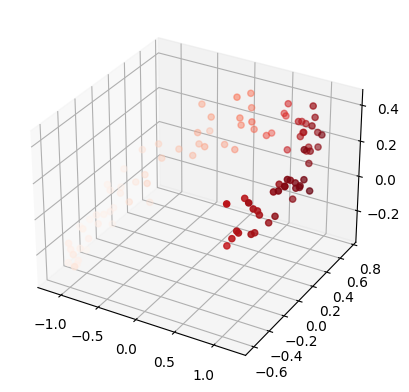

In [3]:
# 데이터를 X_train 변수에 저장합니다.
X_train = data

# 3D 플롯을 생성합니다.
ax = plt.axes(projection='3d')

# 3D 산점도를 그립니다.
# X_train의 첫 번째 열을 x축, 두 번째 열을 y축, 세 번째 열을 z축으로 설정합니다.
# 데이터 포인트의 색상은 X_train의 첫 번째 열의 값에 따라 지정하고, 'Reds' 컬러맵을 사용합니다.
ax.scatter3D(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=X_train[:, 0], cmap='Reds')

plt.show()

## Autoencoder model 작성

- 3 차원 data 를 2 차원으로 차원 축소

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Input

# 인코더(Encoder) 모델을 생성합니다.
# 입력층의 형태는 (3,)으로 설정하며, 은닉층의 출력 노드 수는 2로 설정합니다.
encoder = Sequential([
    Input(shape=(3,)),
    Dense(2, activation='relu')])

# 디코더(Decoder) 모델을 생성합니다.
# 입력층의 형태는 (2,)으로 설정하며, 은닉층의 출력 노드 수는 3으로 설정합니다.
decoder = Sequential([
    Input(shape=(2,)),
    Dense(3)])

# 오토인코더(Autoencoder) 모델을 생성합니다.
autoencoder = Sequential([encoder, decoder])

In [5]:
autoencoder.compile(loss="mse", 
                    optimizer=keras.optimizers.SGD(learning_rate=0.1))

In [6]:
history = autoencoder.fit(X_train, X_train, epochs=200)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6365  
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3525 
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3021 
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2561 
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2359 
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2322 
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2230 
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2115 
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1967 
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1978 
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1781 
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1809 
Epoch 13/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1721 
Epoch 14/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1634 
Epoch 15/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1562 
Epoch 16/200
4/4 ━

## encoder output 시각화

- 학습시킨 encoder 를 이용하여 data를 차원 축소

In [7]:
encodings = encoder.predict(X_train)
encodings.shape

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


(100, 2)

- encoder output을 시각화 

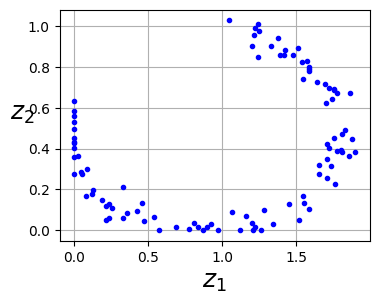

In [8]:
fig = plt.figure(figsize=(4, 3))

# 인코딩된 결과를 산점도로 플롯합니다.
# encodings 배열의 첫 번째 열을 x축, 두 번째 열을 y축으로 설정합니다.
# "b."는 파란색 점을 의미합니다.
plt.plot(encodings[:, 0], encodings[:, 1], "b.")

# x축 레이블을 설정합니다. "$z_1$"는 z_1을 의미하는 LaTeX 형식의 문자열입니다.
plt.xlabel("$z_1$", fontsize=18)

# y축 레이블을 설정합니다. "$z_2$"는 z_2을 의미하는 LaTeX 형식의 문자열입니다.
# rotation=0은 y축 레이블을 수평으로 표시합니다.
plt.ylabel("$z_2$", fontsize=18, rotation=0)

plt.grid(True)
plt.show()

## Decoder 를 이용한 data 복원

- 학습된 decoder를 이용하여 data 복원

In [9]:
decodings = decoder.predict(encodings)

decodings.shape

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


(100, 3)

- 복원된 data 시각화

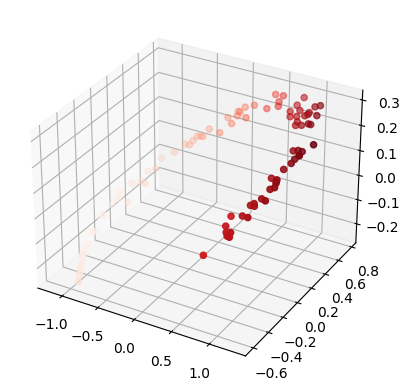

In [10]:
# 3D 플롯을 생성합니다.
ax = plt.axes(projection='3d')

# 3D 산점도를 그립니다.
# decodings 배열의 첫 번째 열을 x축, 두 번째 열을 y축, 세 번째 열을 z축으로 설정합니다.
# 데이터 포인트의 색상은 decodings 배열의 첫 번째 열의 값에 따라 지정하고, 'Reds' 컬러맵을 사용합니다.
ax.scatter3D(decodings[:, 0], decodings[:, 1], decodings[:, 2], c=decodings[:, 0], cmap='Reds')

plt.show()